### Extract data from Ethovision output for downstream analysis

In [2]:
import glob
import os
import numpy as np
import csv
from pylab import *
import pandas as pd
from scipy import signal
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import xlsxwriter
import matplotlib.pyplot as plt

In [3]:
"""Set parent directory"""
#parent_directory = '/Users/donglinhan/Desktop/activityTracker-Dong/'

"""designate folder containing data to analyze"""
data_dir = 'xxxx/'

"""make a results folder within data_dir"""
path = os.path.join(data_dir, "results")
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)

"""load and sort image file names"""
datafiles = glob.glob(os.path.join(data_dir, '*xlsx'))
datafiles.sort(key=lambda x: int(''.join(filter(str.isdigit, x)))) 

"""select wanted sheets from each excel sheet"""
# update the following code with a list of which sheets you need from each excel sheet
    # i.e. excel_1 = [0,1,5] means grab sheets 1, 2, 6 from the first data file
# keep in mind that python indices begin from 0, so sheet 1 will have index 0
# you will have to add/remove to the list when you have more/less data files that you would like to analyze
    # i.e. if you had another data file
        # add excel_5 = [2,3,4,5]
        # add + len(excel_5) to total_length
        # add excel_5 to sheets array
    
total_length = 0
"""excel_1 = [0,1,2,3,4,5]
excel_2 = [0,1,2,3,4,5]
excel_3 = [0,1,2,3,4,5]
excel_4 = [0,1,2,3,4,5]
excel_5 = [0,1,2,3,4,5]
excel_6 = [0,1,2,3,4,5]
excel_7 = [0,1,2,3,4,5]
excel_8 = [0,1,2,3,4,5]
excel_9 = [0,1,2,3,4,5]
excel_10 = [0,1,2,3,4,5]
excel_11 = [0,1,2,3,4,5]
exl_12 = [0,1,2,3,4,5]
excel_13 = [0,1,2,3,4,5]
excel_14 = [0,1,2,3,4,5]
excel_15 = [0,1,2,3,4,5]
excel_16 = [0,1,2,3,4,5]
excel_17 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_18 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_19 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_20 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_21 = [0,1,2,3,4,5,6,7,8,9,10,11]"""


#excel_1 =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]
excel_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]

'''
excel_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
excel_3 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
excel_4 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]excel_2 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_3 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_4 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_5 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_6 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_7 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_8 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_9 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_10 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_11 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_12 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_13 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_14 = [0,1,2,3,4,5,6,7,8,9,10,11]
#excel_2 = [0,1,2,3,4,5,6,7,8,9,10,11]
#excel_2 = [0,1,2,3,4,5]
#excel_3 = [0,1,2,3,4,5]
'''
"""excel_2 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_3 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_4 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_5 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_6 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_7 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_8 = [0,1,2,3,4,5,6,7,8,9,10,11]
excel_9 = [0,1,2,3,4,5,6,7,8,9,10,11]"""

#total_length = len(excel_1)
total_length = 36
sheets = [excel_1]
#sheets = [excel_1, excel_2, excel_3, excel_4, excel_5, excel_6, excel_7, excel_8, excel_9, excel_10, excel_11, excel_12, excel_13, excel_14, excel_15, excel_16, excel_17, excel_18, excel_19, excel_20, excel_21]
x = 0
data = []

"""make dataframe for all raw distance_moved for every excel file and nested sheets"""
for file in datafiles:
    print(file)
    #sheet_name = index of sheets starting from 0
    df = pd.read_excel(file, sheet_name = sheets[x], usecols= 'H', header = 36)
    for column in df:
        data.append(df[column])
    x += 1

D010/Raw data-D010-Trial     1.xlsx


In [17]:
#For 1 min-binned, normalized output
normalize = True

x=0
ind_sheet = 0
column = 1

# change name of output file here
excel_name = path + "/normalized_to_100_bin1.xlsx"
print("writing to " + excel_name + "...")
wb = xlsxwriter.Workbook(excel_name)
worksheet = wb.add_worksheet()
worksheet.write(0, 0, "TS (Time Series)")

#iterating through each of the datafiles in the input folder
for datafile in range(len(datafiles)):
    #iterating through each sheet in each of the datafiles
    for sheet in sheets[x]:
        row = 1
        #replace all dashes(-) with NaN
        new_data = data[ind_sheet].replace('-', np.nan).astype('float')
        #reshape using bin_size delineated above
        masked_data = np.ma.masked_array(new_data, np.isnan(new_data))
        #calculate mean of the masked_data
        mean = np.mean(masked_data, axis=1).data
        #normalize to mean
        raw_score = mean / 2.22 * 100
        act_score = raw_score.astype(int)
        

        name = "normalized"
        #gives each column name for output excel file
        column_name = datafiles[datafile][19:-5] + "_sheet"+ str(sheet + 1) + "_" + name + "_" + str(bin_size)
        #write column name to excel file -> documentation is (row, column, name)
        worksheet.write(0, column, column_name)
        #finds length of act_score to write in time series (below)
        length = len(act_score)
        #write act_score into excel file
        for score in act_score:
            worksheet.write(row, column, score)
            row +=1
        column += 1

        
        
        time = 0
        count = 1
        for i in range(length):
            worksheet.write(count, 0, time)
            time += round(float(1/60),3)
            count += 1
       
        
        ind_sheet += 1
    x += 1

#close workbook to avoid extra data added
wb.close()
print("finished writing to " + excel_name)

writing to D009/results/normalized_to_100_bin1.xlsx...
finished writing to D009/results/normalized_to_100_bin1.xlsx


In [4]:
#For 15 min-binned, raw sum output
normalize = False
bin_size = 15
x=0
ind_sheet = 0
column = 1

# change name of output file here
excel_name = path + "/raw_bin15.xlsx"
print("writing to " + excel_name + "...")
wb = xlsxwriter.Workbook(excel_name)
worksheet = wb.add_worksheet()
worksheet.write(0, 0, "TS (Time Series)")

#iterating through each of the datafiles in the input folder
for datafile in range(len(datafiles)):
    #iterating through each sheet in each of the datafiles
    for sheet in sheets[x]:
        row = 1
        #replace all dashes(-) with NaN
        new_data = data[ind_sheet].replace('-', np.nan).astype('float')
        #reshape using bin_size delineated above
        new_data = new_data.values[: int(np.floor(len(new_data) / bin_size) * bin_size)].reshape((-1, bin_size))
        masked_data = np.ma.masked_array(new_data, np.isnan(new_data))
        #calculate mean of the masked_data
        mean = np.mean(masked_data, axis=1).data
        #normalize to mean
        raw_score = mean / max(mean) * 1000
        act_score = raw_score.astype(int)
        
        if normalize:
            name = "normalized"
            #gives each column name for output excel file
            column_name = datafiles[datafile][19:-5] + "_sheet"+ str(sheet + 1) + "_" + name + "_" + str(bin_size)
            #write column name to excel file -> documentation is (row, column, name)
            worksheet.write(0, column, column_name)
            #finds length of act_score to write in time series (below)
            length = len(act_score)
            #write act_score into excel file
            for score in act_score:
                worksheet.write(row, column, score)
                row +=1
            column += 1
            
        else:
            name = "raw"
            #gives each column name for output excel file
            column_name = datafiles[datafile][13:-5] + "_sheet"+ str(sheet + 1) + "_" + name + "_" + str(bin_size)
            #write column name to excel file -> documentation is (row, column, name)
            worksheet.write(0, column, column_name)
            #finds length of mean data to write in time series (below)
            length = len(mean)
            #write mean into excel file
            for me in mean:
                worksheet.write(row, column, me)
                row +=1
            column += 1
        
        
        #generates time series based on bin_size
        time = 0
        count = 1
        if bin_size == 5:
            for i in range(length):
                worksheet.write(count, 0, time)
                time += round(float(1/12),3)
                count += 1
        #i.e. if bin_size is 15, then iterate "length" (determined above) amount of times and generate the times series by incrementing the time by 0.25 
        elif bin_size == 15:
            for i in range(length):
                worksheet.write(count, 0, time)
                time += 0.25
                count += 1
        else:
            for i in range(length):
                worksheet.write(count, 0, time)
                time += 0.5
                count += 1 
        
        ind_sheet += 1
    x += 1

#close workbook to avoid extra data added
wb.close()
print("finished writing to " + excel_name)

writing to D010/results/raw_bin15.xlsx...
finished writing to D010/results/raw_bin15.xlsx


/var/folders/61/3mr09l995dd210dwbpwxcm5h0000gn/T/ipykernel_75894/2383645753.py:36: RuntimeWarning: invalid value encountered in divide
  raw_score = mean / max(mean) * 1000
/var/folders/61/3mr09l995dd210dwbpwxcm5h0000gn/T/ipykernel_75894/2383645753.py:37: RuntimeWarning: invalid value encountered in cast
  act_score = raw_score.astype(int)
/var/folders/61/3mr09l995dd210dwbpwxcm5h0000gn/T/ipykernel_75894/2383645753.py:36: RuntimeWarning: invalid value encountered in divide
  raw_score = mean / max(mean) * 1000
/var/folders/61/3mr09l995dd210dwbpwxcm5h0000gn/T/ipykernel_75894/2383645753.py:37: RuntimeWarning: invalid value encountered in cast
  act_score = raw_score.astype(int)
/var/folders/61/3mr09l995dd210dwbpwxcm5h0000gn/T/ipykernel_75894/2383645753.py:36: RuntimeWarning: invalid value encountered in divide
  raw_score = mean / max(mean) * 1000
/var/folders/61/3mr09l995dd210dwbpwxcm5h0000gn/T/ipykernel_75894/2383645753.py:37: RuntimeWarning: invalid value encountered in cast
  act_scor

5


<Figure size 640x480 with 0 Axes>

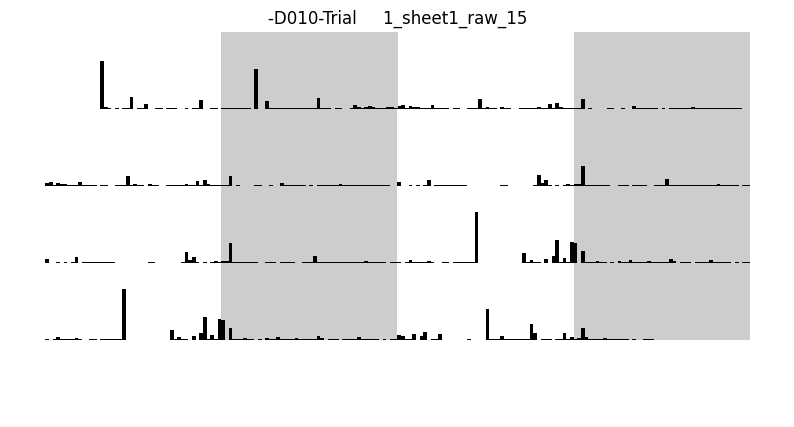

5


<Figure size 640x480 with 0 Axes>

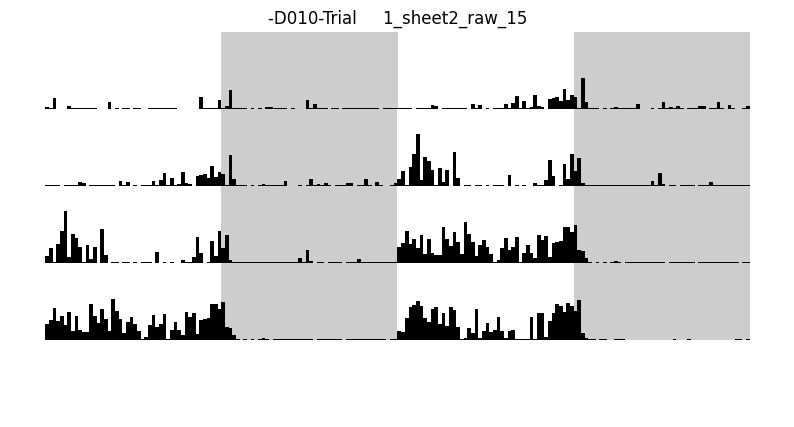

5


<Figure size 640x480 with 0 Axes>

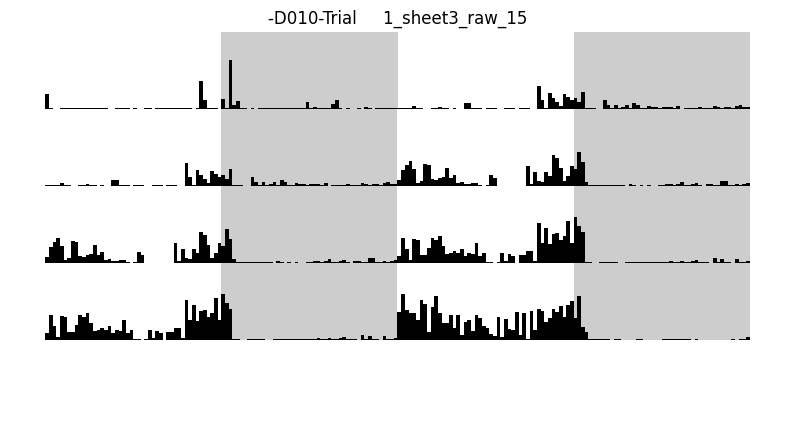

5


<Figure size 640x480 with 0 Axes>

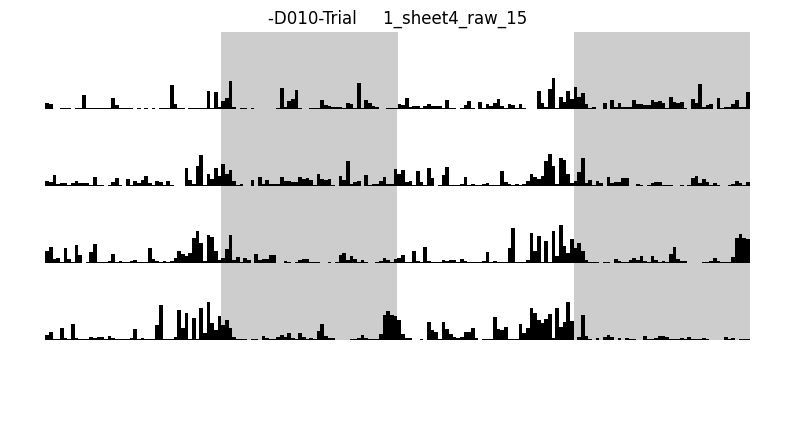

5


<Figure size 640x480 with 0 Axes>

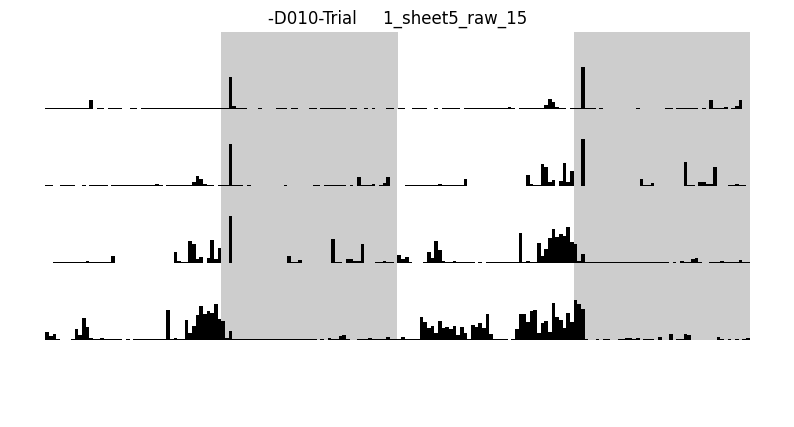

5


<Figure size 640x480 with 0 Axes>

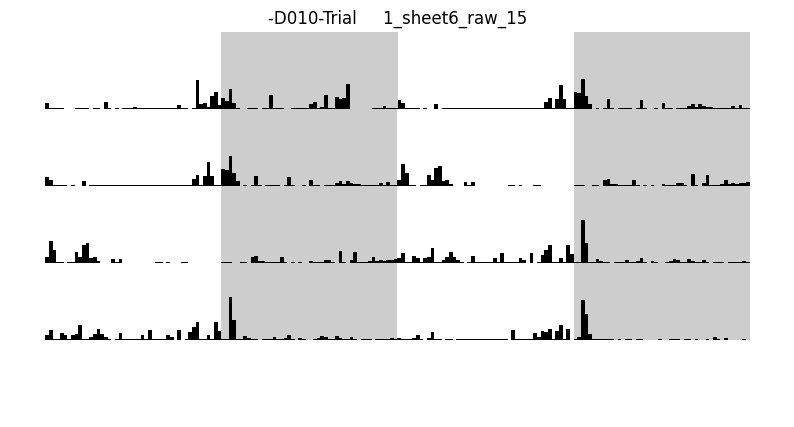

5


<Figure size 640x480 with 0 Axes>

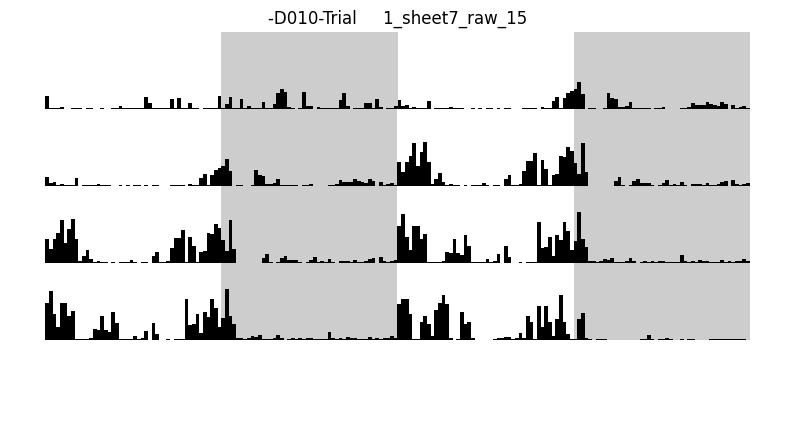

5


<Figure size 640x480 with 0 Axes>

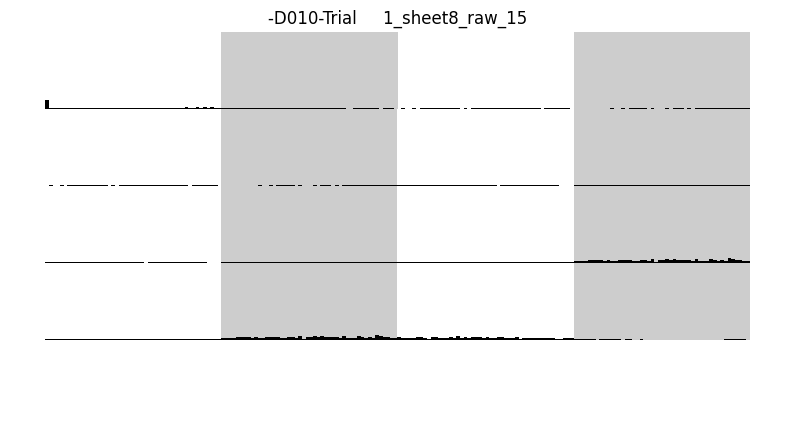

5


<Figure size 640x480 with 0 Axes>

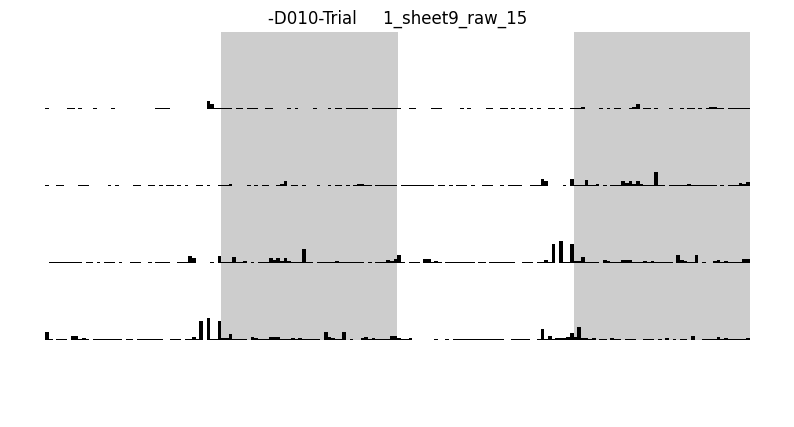

5


<Figure size 640x480 with 0 Axes>

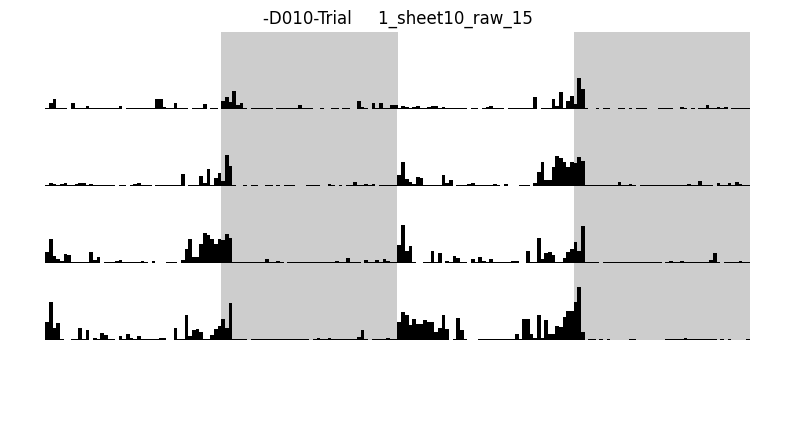

5


<Figure size 640x480 with 0 Axes>

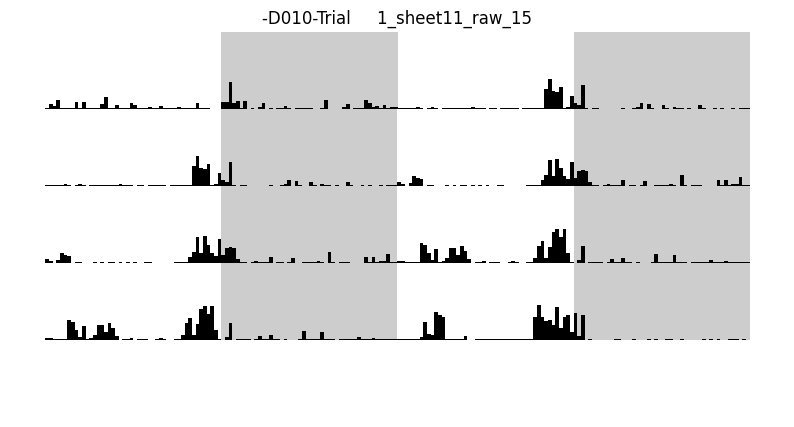

5


<Figure size 640x480 with 0 Axes>

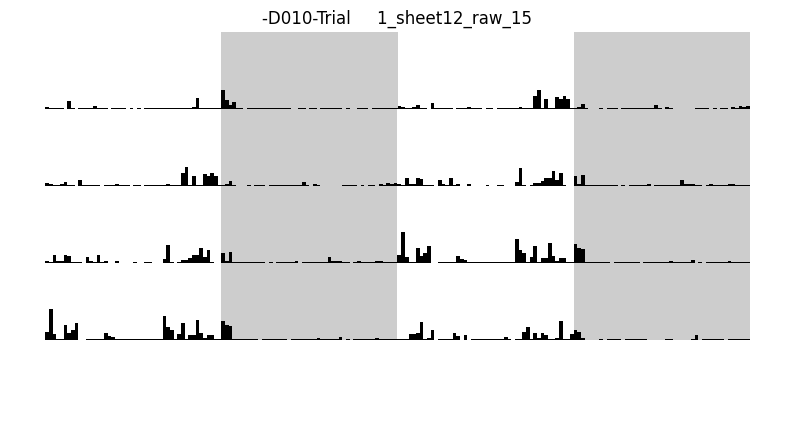

5


<Figure size 640x480 with 0 Axes>

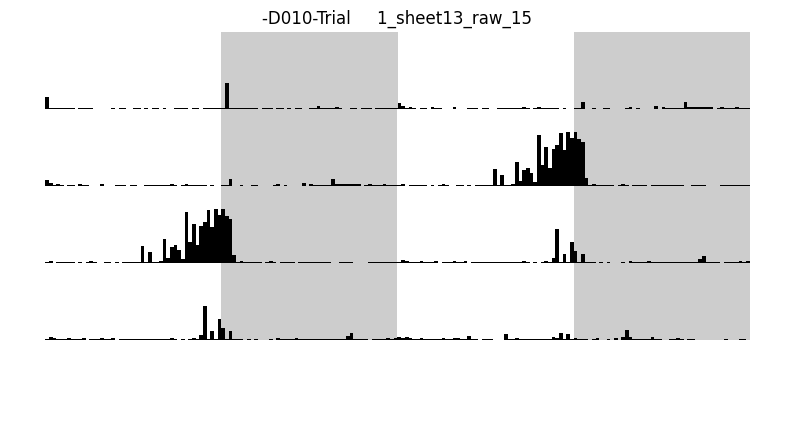

5


<Figure size 640x480 with 0 Axes>

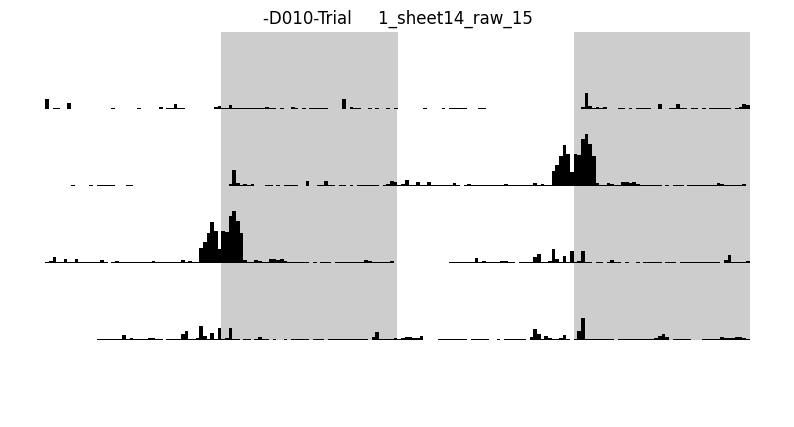

5


<Figure size 640x480 with 0 Axes>

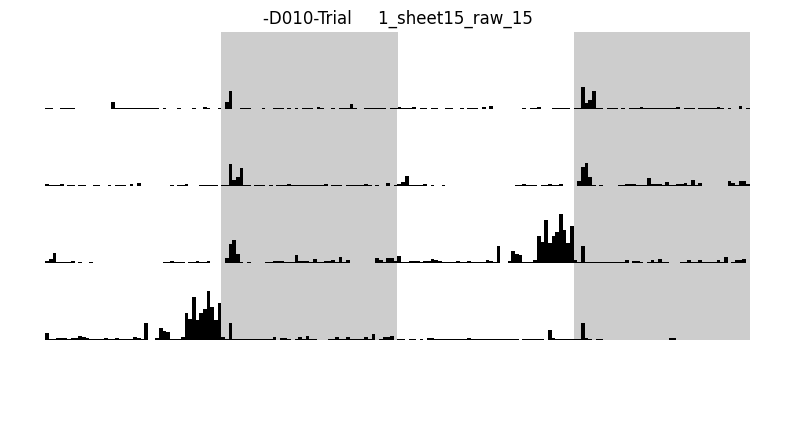

5


<Figure size 640x480 with 0 Axes>

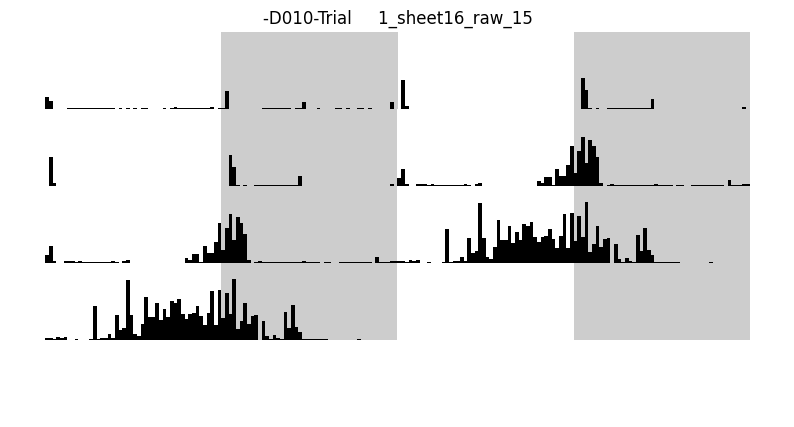

5


<Figure size 640x480 with 0 Axes>

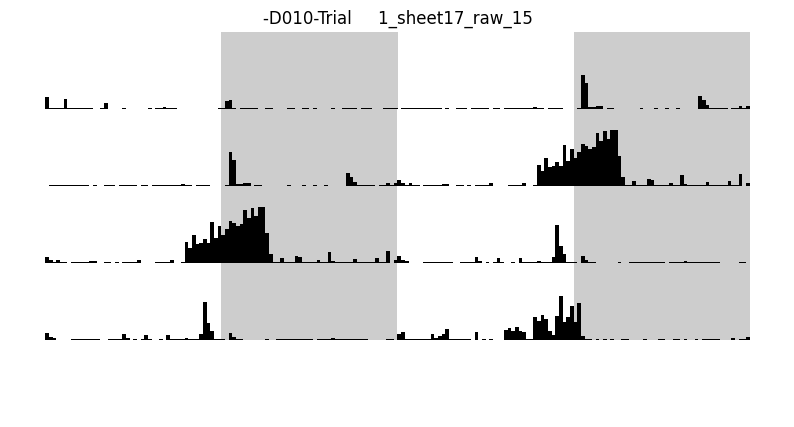

5


<Figure size 640x480 with 0 Axes>

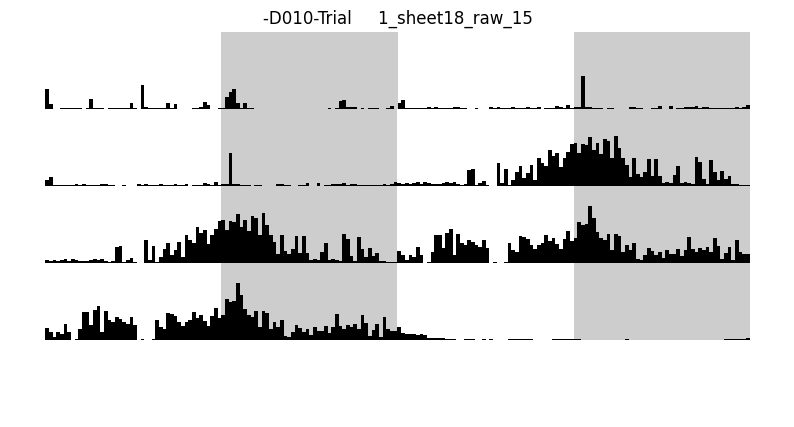

5


<Figure size 640x480 with 0 Axes>

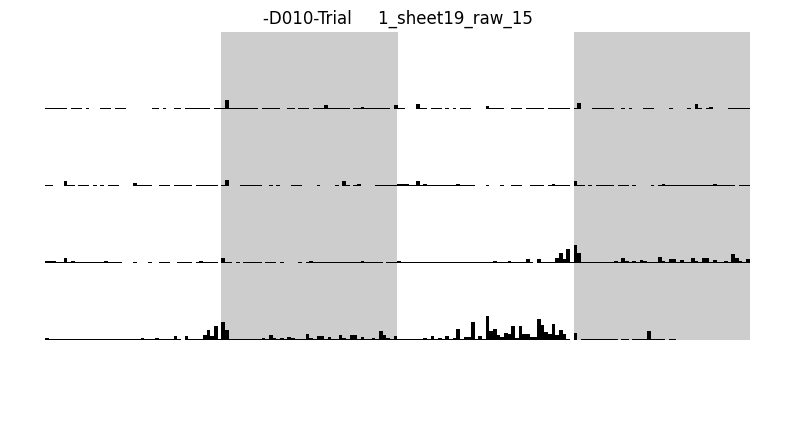

5


<Figure size 640x480 with 0 Axes>

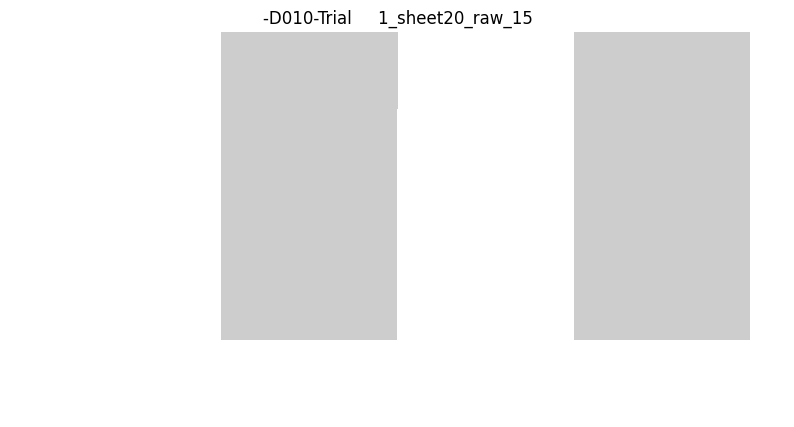

5


<Figure size 640x480 with 0 Axes>

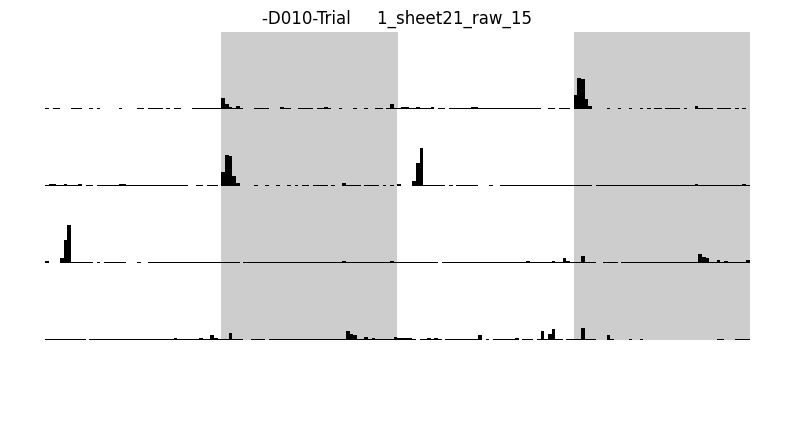

5


<Figure size 640x480 with 0 Axes>

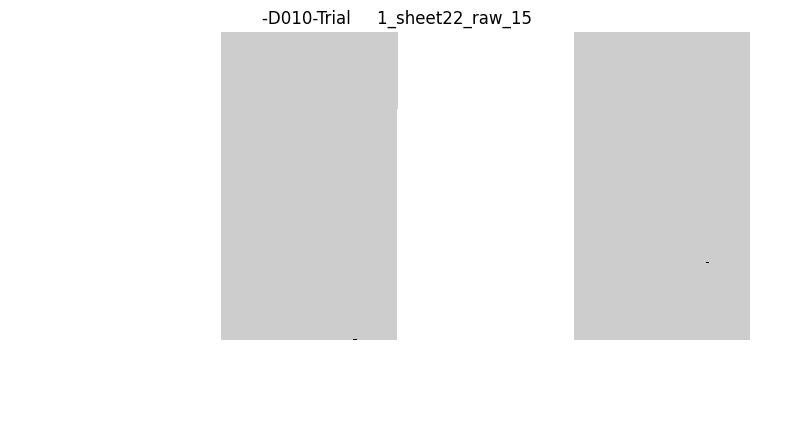

5


<Figure size 640x480 with 0 Axes>

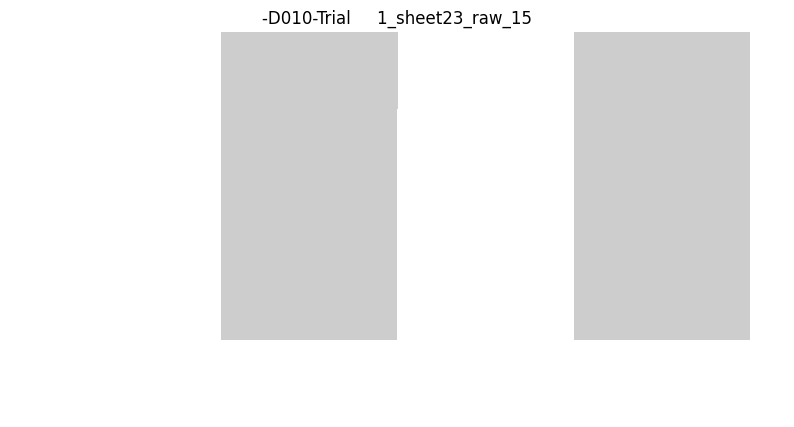

5


<Figure size 640x480 with 0 Axes>

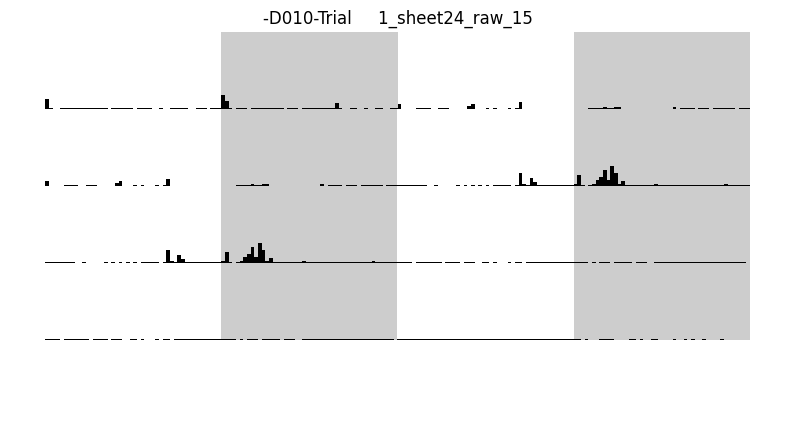

5


<Figure size 640x480 with 0 Axes>

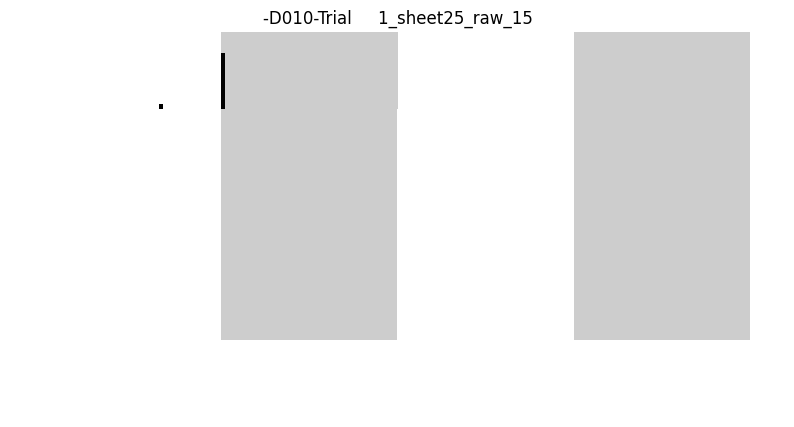

5


<Figure size 640x480 with 0 Axes>

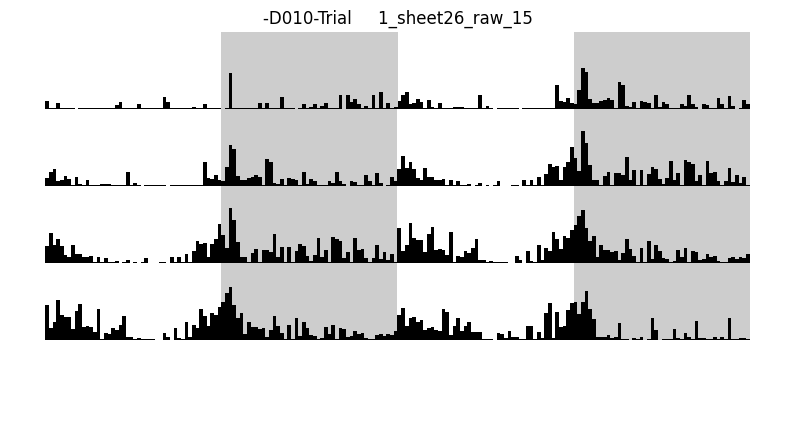

5


<Figure size 640x480 with 0 Axes>

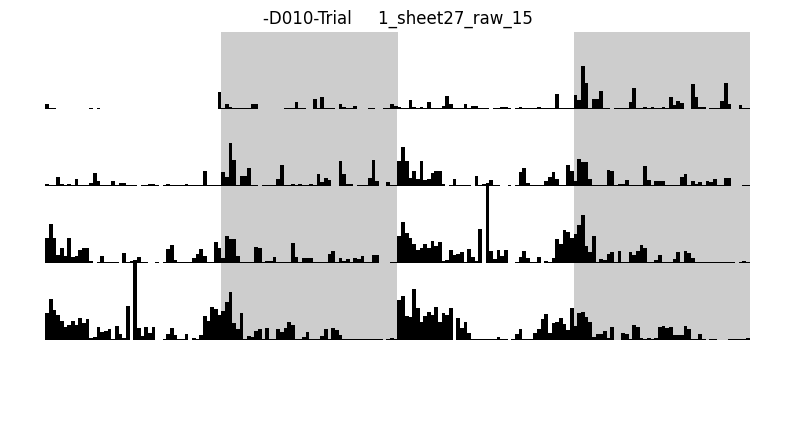

5


<Figure size 640x480 with 0 Axes>

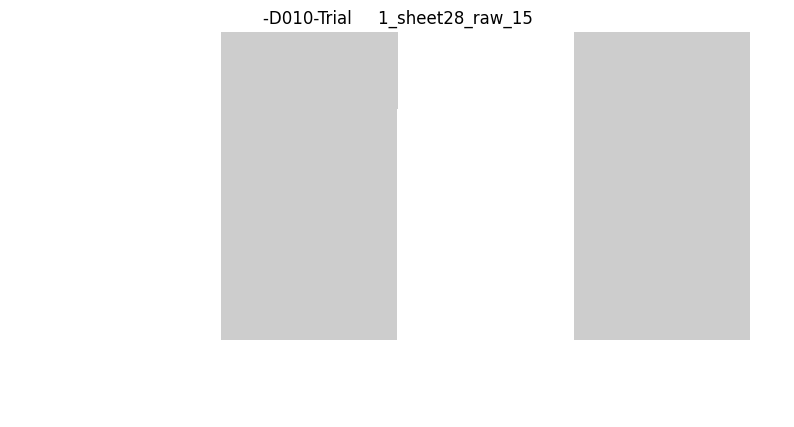

5


<Figure size 640x480 with 0 Axes>

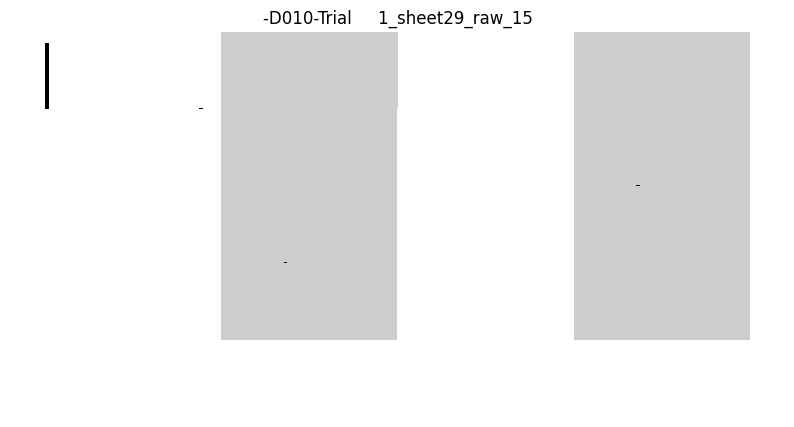

5


<Figure size 640x480 with 0 Axes>

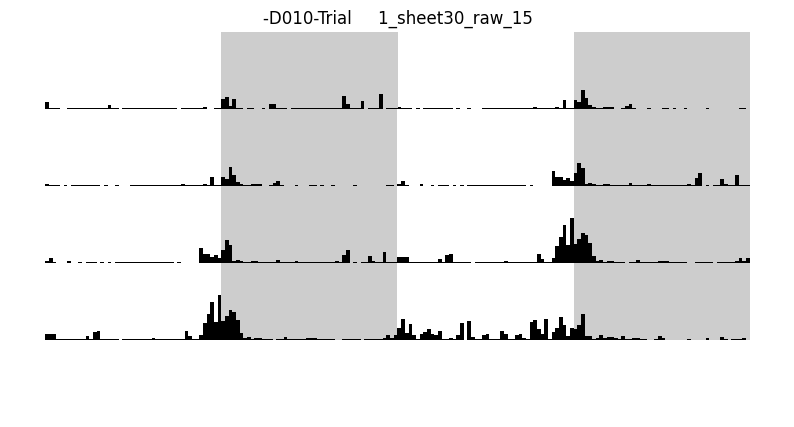

5


<Figure size 640x480 with 0 Axes>

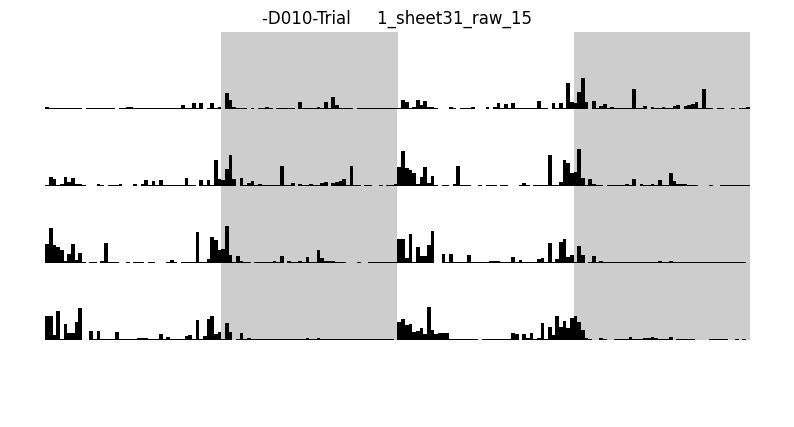

5


<Figure size 640x480 with 0 Axes>

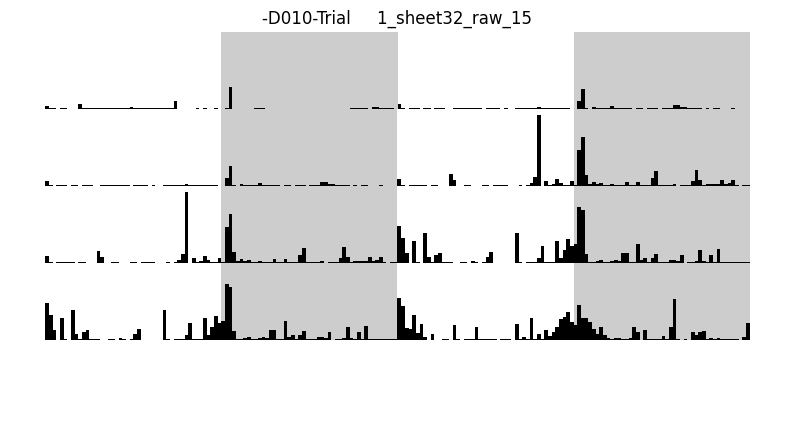

5


<Figure size 640x480 with 0 Axes>

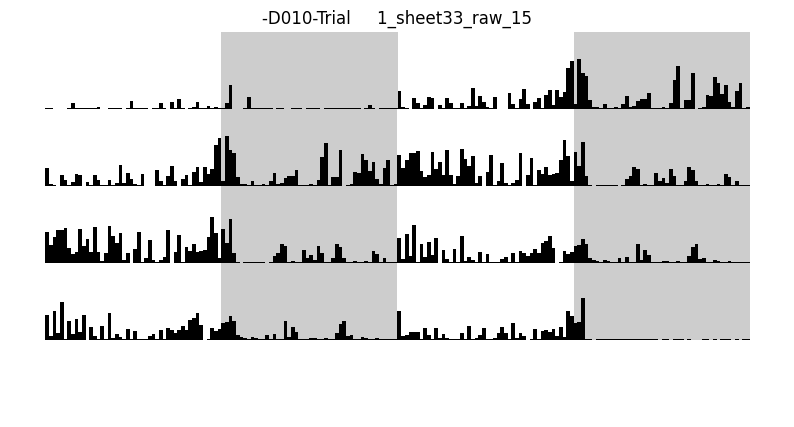

5


<Figure size 640x480 with 0 Axes>

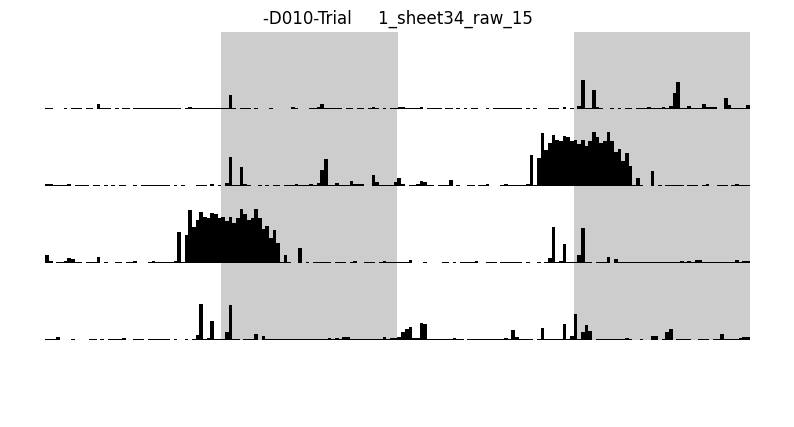

5


<Figure size 640x480 with 0 Axes>

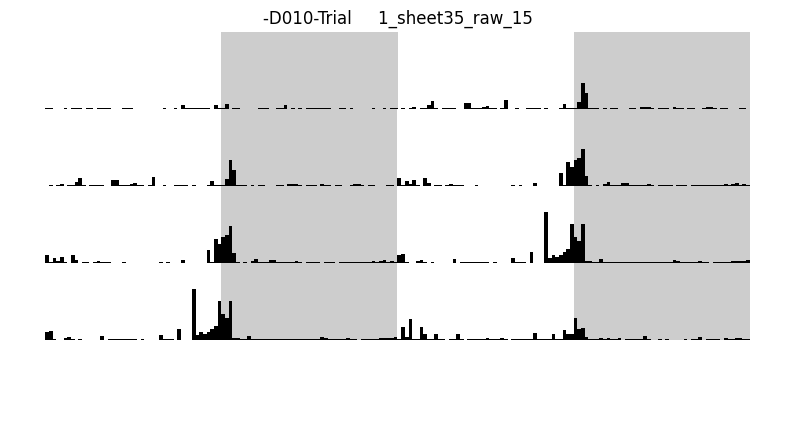

5


<Figure size 640x480 with 0 Axes>

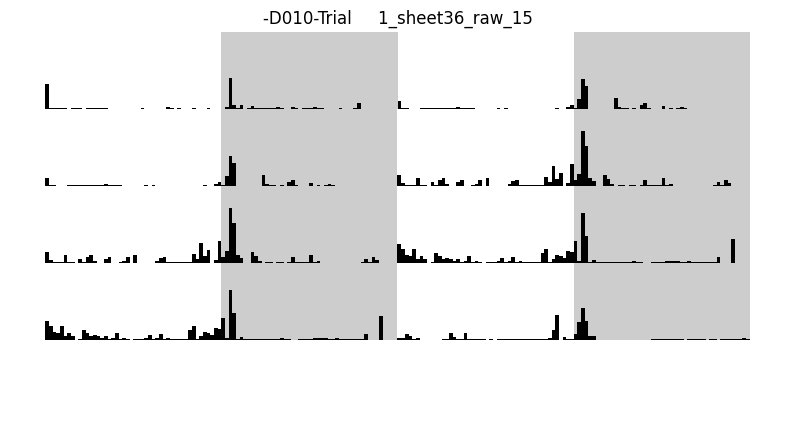

In [5]:
#Double-plotted actogram visualization
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.backends.backend_pdf import PdfPages
import glob
import os
import numpy as np
import csv
from pylab import *
import pandas as pd
from scipy import signal
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import xlsxwriter
import matplotlib.pyplot as plt

LDD = True
total_length = 36
cycle1 = "LD"
cycle1_duration = 5
cycle2 = "DD"
cycle2_duration = 0
photophase = 12
length = (cycle1_duration + cycle2_duration) * 96
file = '/Users/donglinhan/Desktop/activityTracker-Dong/D010/results/raw_bin15.xlsx'


#replace pdf name with what you want ur results pdf to be
if LDD:
    pdf = PdfPages('D010_raw_LDD_bar.pdf')
else:
    pdf = PdfPages('normalized_LD_bar00290030.pdf')

#reading the columns of the excel file and storing them into an array
df = pd.read_excel(file, index_col=0)
cols = df.columns.ravel()
#read in time series from excel file
time_series = pd.read_excel(file, usecols = [0])


#iterates though all columns (total_length = # of columns)
for i in range(total_length):
    column_name = cols[i]
    consolidated_data = pd.read_excel(file, usecols = [i+1])
    hr = time_series['TS (Time Series)'][length]
    ts = []
    time_s = time_series.to_numpy()
    for i in time_s:
        ts.append(i[0])
    floor = int(hr//24)
    print (floor)

    figure = plt.figure()
    consolidated_data = consolidated_data.to_numpy()
    consolidated_data[np.isnan(consolidated_data)] = 0
    cdata = []
    for i in consolidated_data:
        cdata.append(i[0])

    #x,y are the delimeters of the time chunk we want to look at i.e. 0 to 48 hrs, 24 hrs to 72 hrs
    x = 0
    y = 192
    figure, ax = plt.subplots(floor, sharey = True, figsize = (10,5))
    plt.subplots_adjust(hspace=0)
    for num in range(0, floor-1): #144 -> 0,48; 24,72; 48,96; 72,120; 96,144
        ax[num].bar(ts[x:y],cdata[x:y], color="black", width = 0.25, align='edge')
        ax[num].set_ylim([0, 1.5])
        if num+1 < cycle1_duration:
            if cycle1 == "LD" :
                ax[num].axvspan(num*24+photophase, (num+1)*24, facecolor='#9c9c9c', alpha=0.5, zorder=0)
                ax[num].axvspan((num+1)*24+photophase, (num+2)*24, facecolor='#9c9c9c', alpha=0.5, zorder=0)
            if cycle1 == "DD" :
                ax[num].axvspan(num*24, (num+2)*24, facecolor='#9c9c9c', alpha=0.5, zorder=0)
        elif num+1 == cycle1_duration:
            if cycle1 == "LD":
                ax[num].axvspan(num*24+photophase, (num+1)*24, facecolor='#9c9c9c', alpha=0.5, zorder=0)
            if cycle1 == "DD":
                ax[num].axvspan(num*24, (num+2)*24, facecolor='#9c9c9c', alpha=0.5, zorder=0)
            if cycle2 == "LD":
                ax[num].axvspan((num+1)*24+photophase, (num+2)*24, facecolor='#9c9c9c', alpha=0.5, zorder=0)
            if cycle2 == "DD" and cycle1 == "LD":
                ax[num].axvspan((num+1)*24, (num+1)*24+photophase, facecolor='#d3d3d3', alpha=0.5, zorder=0)
                ax[num].axvspan((num+1)*24+photophase, num*24+48, facecolor='#9c9c9c', alpha=0.5, zorder=0)
        elif num+1 < cycle1_duration + cycle2_duration:
            if cycle2 == "DD" and cycle1 == "LD":
                ax[num].axvspan(num*24, num*24+photophase, facecolor='#d3d3d3', alpha=0.5, zorder=0)
                ax[num].axvspan(num*24+photophase, (num+1)*24, facecolor='#9c9c9c', alpha=0.5, zorder=0)
                ax[num].axvspan((num+1)*24, (num+1)*24+photophase, facecolor='#d3d3d3', alpha=0.5, zorder=0)
                ax[num].axvspan((num+1)*24+photophase, num*24+48, facecolor='#9c9c9c', alpha=0.5, zorder=0)
        
        ax[num].axis("off") #remove frame and ticks
        x += 96
        y += 96
    ax[num+1].spines['top'].set_visible(False)
    ax[num+1].spines['right'].set_visible(False)
    ax[num+1].spines['bottom'].set_visible(False)
    ax[num+1].spines['left'].set_visible(False)
    ax[num+1].get_yaxis().set_ticks([])
    ax[num+1].get_xaxis().set_ticks([])
    
    ax[0].set_title(column_name)

        
    plt.show()
    pdf.savefig(figure)       
pdf.close()